## XOR 이해하기 with Keras

In [1]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.3.0'

In [3]:
# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

Remember !! XOR : 모두 같으면 0

In [15]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]

y_data = [0,
          1,
          1,
          0]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

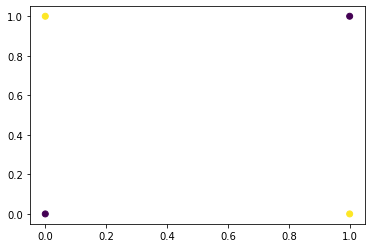

In [16]:
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)

In [17]:
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import optimizers
from tensorflow.keras import models

In [18]:
model = models.Sequential()
model.add(layers.Dense(2, input_dim=2))
model.add(layers.Activation('tanh'))
#model.add(layers.Dense(2))
#model.add(layers.Activation('tanh'))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

In [19]:
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


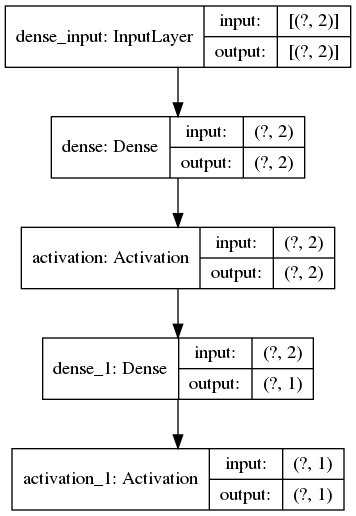

In [9]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_xor.png', show_shapes=True)

epochs 를 1000으로 변경해보았습니다.

In [21]:
history = model.fit(x_data, y_data,  batch_size=1, epochs=1000)

Epoch 1/1000
4/4 [==============================] - 0s 444us/step - loss: 0.7663 - accuracy: 0.5000
Epoch 2/1000
4/4 [==============================] - 0s 441us/step - loss: 0.7588 - accuracy: 0.5000
Epoch 3/1000
4/4 [==============================] - 0s 373us/step - loss: 0.7526 - accuracy: 0.5000
Epoch 4/1000
4/4 [==============================] - 0s 349us/step - loss: 0.7483 - accuracy: 0.5000
Epoch 5/1000
4/4 [==============================] - 0s 300us/step - loss: 0.7439 - accuracy: 0.5000
Epoch 6/1000
4/4 [==============================] - 0s 303us/step - loss: 0.7415 - accuracy: 0.5000
Epoch 7/1000
4/4 [==============================] - 0s 300us/step - loss: 0.7403 - accuracy: 0.5000
Epoch 8/1000
4/4 [==============================] - 0s 292us/step - loss: 0.7377 - accuracy: 0.5000
Epoch 9/1000
4/4 [==============================] - 0s 288us/step - loss: 0.7351 - accuracy: 0.5000
Epoch 10/1000
4/4 [==============================] - 0s 293us/step - loss: 0.7321 - accuracy: 0.5000

### 학습 결과 그려보기

Text(0.5, 0, 'epoch')

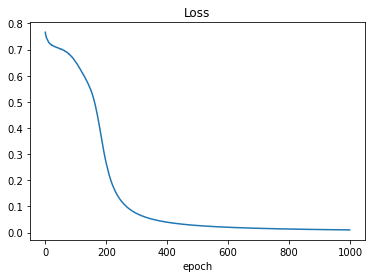

In [22]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

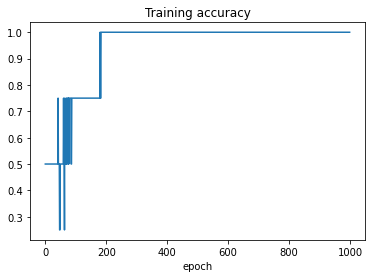

In [23]:
plt.plot(history.history['accuracy'])
plt.title('Training accuracy')
plt.xlabel('epoch')

###  확률 찍어보기

In [24]:
hypothesis = model.predict(x_data)
print(hypothesis)

[[0.00742781]
 [0.98698914]
 [0.9871466 ]
 [0.00631335]]


In [25]:
predicted = hypothesis > 0.5
print(predicted)

[[False]
 [ True]
 [ True]
 [False]]


* XOR 분류에서 정확도 75의 의미는?

learning rate 0.1기준 150정도 epoch에서야 정확도 75%에 도달했다. 